# <b>Overview of analysis </b>

<b>References:</b>

    - https://reybahl.medium.com/eeg-signal-analysis-with-python-fdd8b4cbd306
    - https://mne.tools/stable/auto_tutorials/intro/10_overview.html#sphx-glr-auto-tutorials-intro-10-overview-py


## Importing Libraries

In [1]:
import numpy as np
import mne

## Loading data

We’ll start this tutorial by loading one of the example datasets (called “Sample”), which contains EEG and MEG data from one subject performing an audiovisual experiment, along with structural MRI scans for that subject.

mne.datasets.sample.data_path() --> The mne.datasets.sample.data_path function will automatically download the dataset if it isn’t found in one of the expected locations, then return the directory path to the dataset.

In [2]:
sample_data_folder = mne.datasets.sample.data_path("D:\Quantum\CDAC\Data_Sets\Sample")
sample_data_raw_file = (
    sample_data_folder / "MEG" / "sample" / "sample_audvis_filt-0-40_raw.fif"   
)
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw = raw.pick_types(eeg=True, meg=False, eog=False, exclude='bads')

Opening raw data file D:\Quantum\CDAC\Data_Sets\Sample\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


In [3]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 41700 (277.7 s), ~2.9 MB, data not loaded>
<Info | 14 non-empty values
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>


In [4]:
raw.describe()

<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 41700 (277.7 s), ~2.9 MB, data not loaded>
ch  name     type  unit        min         Q1     median         Q3        max
 0  EEG 001  EEG   µV      -300.18     -13.14      -3.69       7.06     267.67
 1  EEG 002  EEG   µV      -292.30      -4.01       5.15      15.81     270.47
 2  EEG 003  EEG   µV      -279.49       2.63      11.39      22.26     277.78
 3  EEG 004  EEG   µV      -209.77       8.40      20.08      32.22     242.74
 4  EEG 005  EEG   µV      -216.36      10.97      20.33      30.98     219.61
 5  EEG 006  EEG   µV      -237.24      -0.25       9.24      19.80     233.67
 6  EEG 007  EEG   µV      -253.08      -4.26       5.86      17.27     280.56
 7  EEG 008  EEG   µV      -162.02      17.23      27.71      38.67     322.31
 8  EEG 009  EEG   µV      -171.87      15.91      24.55      34.02     173.23
 9  EEG 010  EEG   µV      -182.08      -5.49       7.61      21.47     162.95
10  EEG 011  EEG   µV      -191.71      -3.

In [5]:
raw2 = raw.crop(0, 60) # limitting the data from raw file to be between specific time (in seconds)       

In [6]:
raw2.describe()

<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 9010 (60.0 s), ~2.9 MB, data not loaded>
ch  name     type  unit        min         Q1     median         Q3        max
 0  EEG 001  EEG   µV       -52.87     -11.81      -4.59       2.98     267.67
 1  EEG 002  EEG   µV       -42.47      -4.04       3.23      10.85     270.47
 2  EEG 003  EEG   µV       -34.50       3.58      10.85      19.38     273.73
 3  EEG 004  EEG   µV       -26.03       9.34      21.66      33.30     203.48
 4  EEG 005  EEG   µV       -26.72      12.32      18.68      26.15     201.27
 5  EEG 006  EEG   µV       -54.61      -0.22       7.78      16.05     204.44
 6  EEG 007  EEG   µV       -43.80      -3.21       4.58      12.88     260.31
 7  EEG 008  EEG   µV       -12.29      19.10      27.28      36.08     162.43
 8  EEG 009  EEG   µV       -10.86      15.07      21.45      28.40     146.13
 9  EEG 010  EEG   µV       -48.53       4.80      15.42      26.46     127.35
10  EEG 011  EEG   µV       -53.23      -1.91

## Plotting EEG data

Using matplotlib as 2D backend.


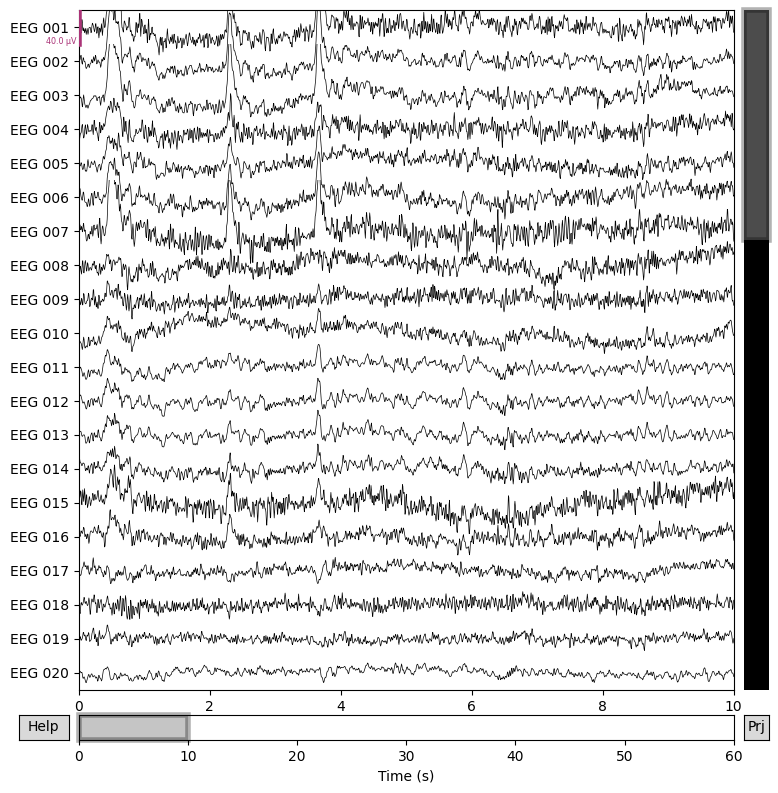

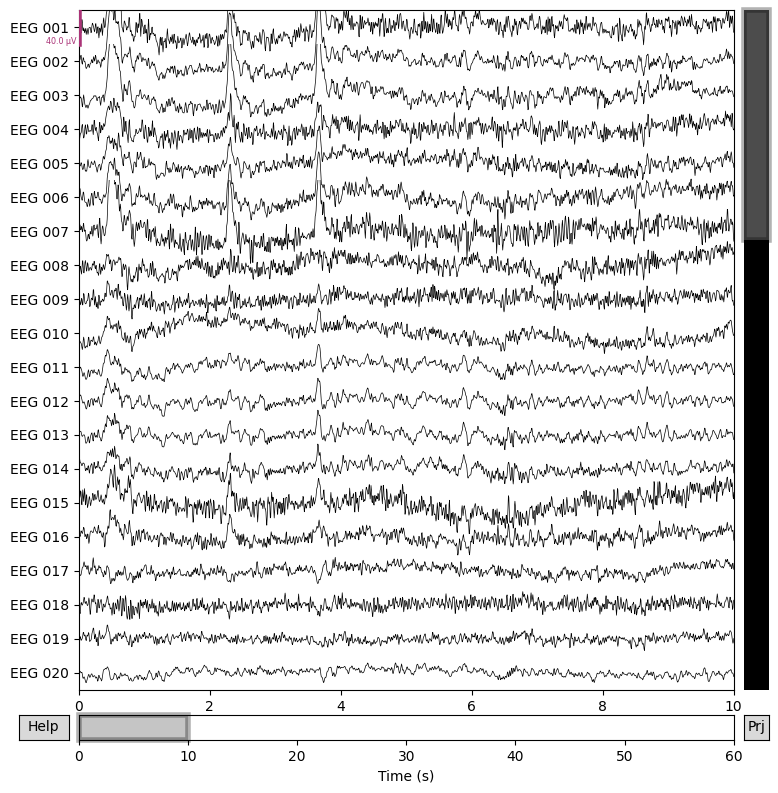

In [7]:
raw.plot()

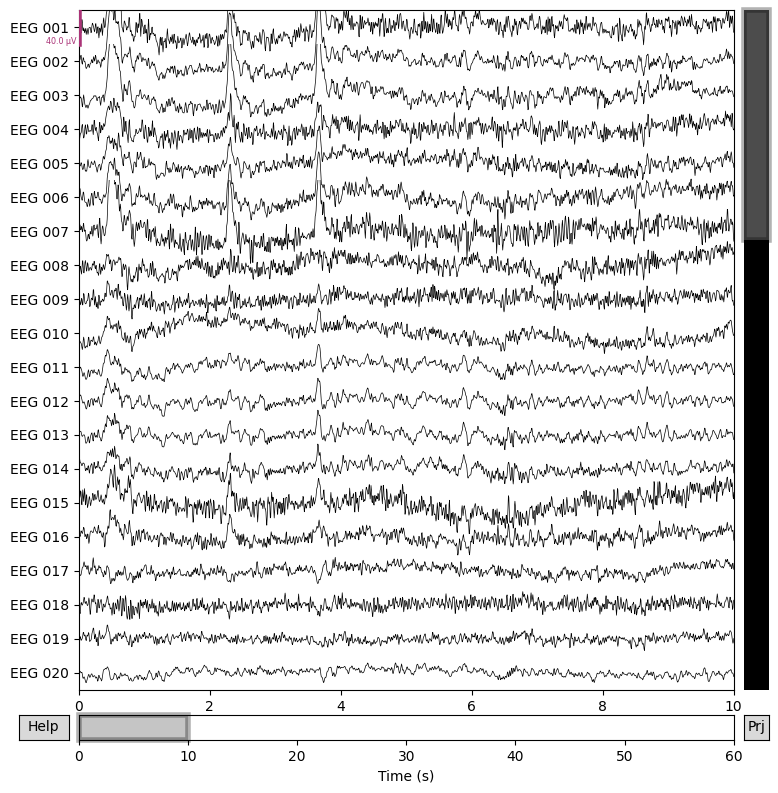

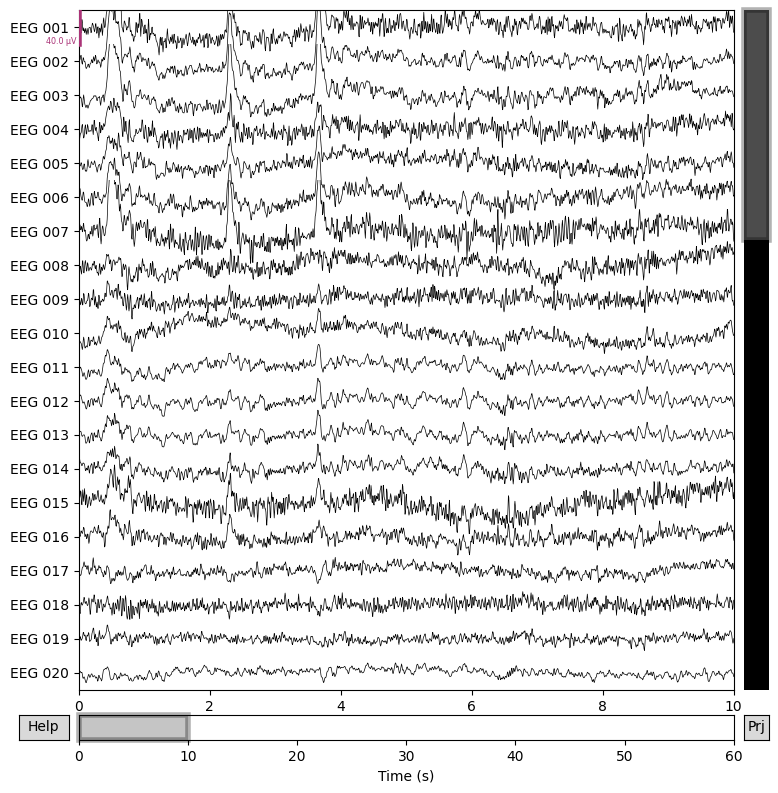

In [8]:
raw2.plot()

#### Plotting Power Spectral Density (PSD)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)


C:\Users\Saiyam Sakhuja\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


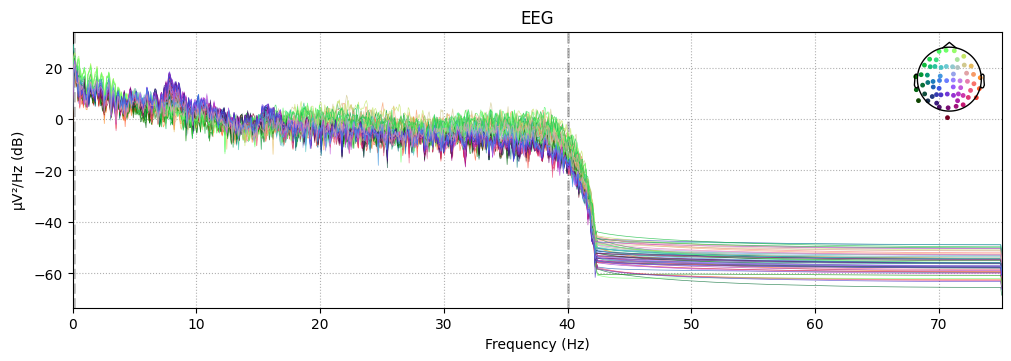

In [9]:
raw.plot_psd()

Effective window size : 13.639 (s)


C:\Users\Saiyam Sakhuja\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


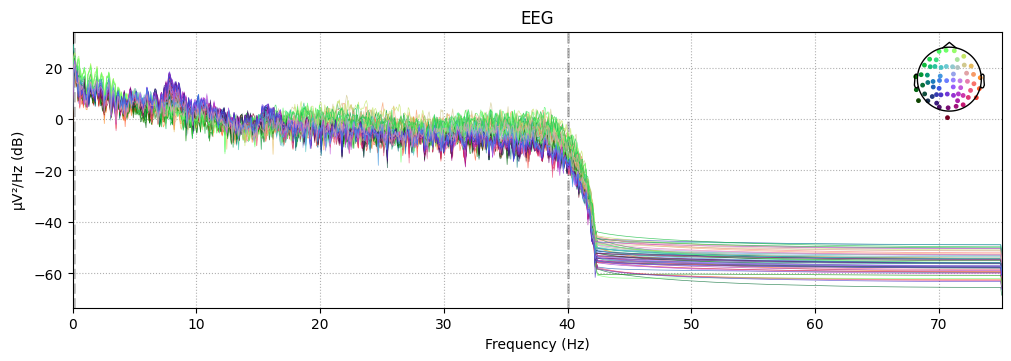

In [13]:
raw2.compute_psd().plot()       # alternate way of plotting psd

## Downsampling (Resampling)

EEG recordings, or electroencephalography recordings, capture electrical activity in the brain over time. One key characteristic of EEG data is its high temporal resolution, meaning it can capture changes in brain activity with high precision and accuracy. To achieve this level of precision, EEG signals are often recorded at high sampling rates, such as 1000 Hz or higher. 

However, high sampling rates come with a trade-off: they consume more memory and computational resources. This is because each data point in the EEG signal requires storage and processing. In situations where extremely precise timing is not essential for the analysis, downsampling the EEG signal can be a beneficial strategy.

Downsampling involves reducing the number of data points in the EEG signal while maintaining its essential characteristics. By decreasing the sampling rate, the amount of data to be stored and processed is reduced, which can significantly save on memory and computation time.

While downsampling sacrifices some level of temporal precision, it may be acceptable in certain applications where the fine temporal details of the EEG signal are not critical. For example, in some types of analysis like long-term monitoring or broad trend analysis, the exact timing of brain activity changes may not be as important as capturing the overall patterns.

Overall, downsampling offers a balance between precision and computational efficiency, making EEG data more manageable and accessible for various types of analysis and research applications.

<i><b>'Raw objects'</i></b> have a <i><b>'resample'</b></i> method that can be used to convert from one sample rate to another.

In [16]:
raw2.resample(600)       # here, we are resampling our 'raw2' raw object to sampling rate of 600 Hz.

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,146 points
Good channels,59 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,600.00 Hz
Highpass,0.10 Hz
Lowpass,40.00 Hz


## Filtering

1. High-Pass Filter
2. Low-Pass Filter
3. Notch Filter